In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test = pd.read_csv('./data/test.csv')
train = pd.read_csv('./data/train.csv')

In [3]:
train_label = train['label'].copy()
train.drop(columns='label', inplace= True)

In [4]:
print(train.shape)
print(test.shape)

(42000, 784)
(28000, 784)


In [5]:
train = train.values.reshape((42000,28,28))
test = test.values.reshape((28000,28,28))

In [6]:
print(train.shape)
print(test.shape)
print(np.min(train), np.max(train))
print(np.min(test), np.max(test))

(42000, 28, 28)
(28000, 28, 28)
0 255
0 255


In [7]:
train = train/255
test = test/255

9


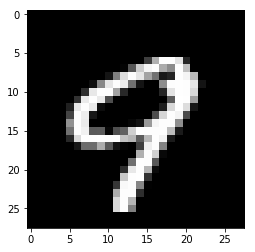

In [8]:
img_num=100
plt.imshow(train[img_num], cmap='gray')
print(train_label[img_num])

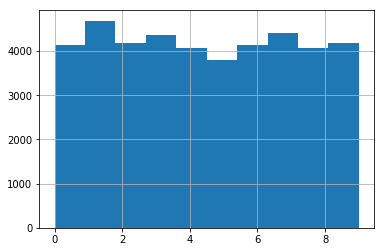

In [9]:
plt.hist(train_label,bins=10)
plt.grid()

In [ ]:
#from https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

In [ ]:
train = np.pad(train, pad_width=((0,0),(2,2),(2,2)), mode ='constant')
test = np.pad(test, pad_width=((0,0),(2,2),(2,2)), mode ='constant')

In [ ]:
train = torch.from_numpy(train)
test = torch.from_numpy(test)

In [ ]:
print(train.shape)
print(test.shape)

In [ ]:
input=train[0].unsqueeze(0).unsqueeze(0)

net(input)

In [ ]:
output = net(input)
target = torch.arange(1, 11)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

In [ ]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

In [ ]:
train1 = torch.utils.data.TensorDataset(train, train_labels.view(-1))
train_loader = torch.utils.data.DataLoader(train1, batch_size=64, shuffle=False)

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    i=0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')